reference：http://www.ncsa.illinois.edu/Conferences/LSST18/assets/pdfs/hariri_forest.pdf

## 1 IsolationForest 简介

IsolationForest指孤立森林，是一种高效的异常检测算法。在所有样本数据中，异常数据具有数量少并且与大多数数据不同的特点，利用这一特性分割样本，那些异常数据也容易被隔离处理。

IsolationForest算法的大致流程如下：

- 选取训练样本数据
- 随机选取数据的某一维度
- 随机选取该维度的某一个值（最大值和最小值之间）
- 通过这个值画一条直线，将数据分割
- 重复上面的2-3步骤直到结束（收敛条件）


## 2 代码实现
https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [5]:
rng=np.random.RandomState(42)

In [23]:
# 生成训练数据
X=0.3*rng.randn(100,2) # 100条二维数据
X_train=np.r_[X+2,X-2] # 200条数据（X+2,X-2）拼接而成

X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

In [24]:
# 基于分布生成一些观测正常的数据
X_outliers=rng.uniform(low=-4,high=4,size=(20,2))

In [26]:
# 训练隔离森林模型
clf=IsolationForest(behaviour='new',max_samples=100,random_state=rng,contamination='auto')
clf.fit(X_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

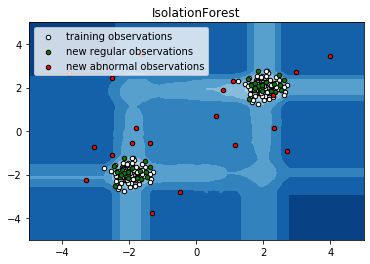

In [31]:
# 画图
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # 生成网络数据 https://www.cnblogs.com/lemonbit/p/7593898.html
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r) # 等高线

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()